# 1. Carregamento das Bibliotecas

In [19]:
##Carregar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 2. Carregamento do Dataset 

In [2]:
##Carregar o dataset

df = pd.read_csv("dataset_sudeste_simples_realista_outliers-2k.csv")

# 3. Display do Dataset

## 3.1 - Listando as colunas

In [3]:
df.columns.tolist()

['id', 'idade', 'renda', 'cidade', 'categoria', 'nota', 'feedback']

## 3.2 - Listando informações gerais

In [4]:
print("\n### Informações gerais do Dataset ###\n")
df.info()


### Informações gerais do Dataset ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2000 non-null   int64  
 1   idade      1982 non-null   float64
 2   renda      1983 non-null   float64
 3   cidade     1988 non-null   object 
 4   categoria  1979 non-null   object 
 5   nota       1970 non-null   float64
 6   feedback   1975 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 109.5+ KB


## 3.3 - Listando as 10 primeiras e as 10 últimas linhas do dataset

In [5]:
print("\n### Exibindo as primeiras 10 linhas do dataset ###\n")
df.head(10)


### Exibindo as primeiras 10 linhas do dataset ###



,id,idade,renda,cidade,categoria,nota,feedback
0,1,39.0,5112.57,Belo Horizonte,A,4.5,Bom
1,2,64.0,9510.34,Belo Horizonte,B,5.4,Ruim
2,3,61.0,8970.80,São Paulo,B,5.0,Ruim
3,4,61.0,8526.52,Rio de Janeiro,A,1.8,Bom
4,5,53.0,3531.76,Vitória,B,5.5,Bom
5,6,23.0,7492.18,Rio de Janeiro,B,2.4,Regular
6,7,19.0,2478.38,Belo Horizonte,A,3.0,Ruim
7,8,65.0,4143.16,Belo Horizonte,A,3.4,Regular
8,9,24.0,6109.96,Vitória,A,4.4,Regular
9,10,17.0,8320.09,Belo Horizonte,A,1.6,Regular


In [6]:
print("\n### Exibindo as últimas 10 linhas do dataset ###\n")
df.tail(10)


### Exibindo as últimas 10 linhas do dataset ###



,id,idade,renda,cidade,categoria,nota,feedback
1990,1991,42.0,11619.13,São Paulo,B,8.2,Ruim
1991,1992,36.0,12318.31,Belo Horizonte,B,5.6,Regular
1992,1993,59.0,6357.74,Belo Horizonte,B,8.0,Bom
1993,1994,33.0,5594.33,São Paulo,B,4.4,Bom
1994,1995,52.0,8335.10,Belo Horizonte,B,9.5,Bom
1995,1996,66.0,7223.47,Belo Horizonte,B,3.8,Ruim
1996,1997,52.0,11712.34,Rio de Janeiro,A,8.4,Regular
1997,1998,48.0,7679.22,Vitória,A,0.1,Regular
1998,1999,27.0,3062.80,Vitória,B,2.1,Bom
1999,2000,21.0,12849.76,São Paulo,B,6.3,Regular


## 3.4 - Informações Estatísticas do Dataset

In [7]:
print("\n### Descrição Estatística ###\n")
print(df.describe())


### Descrição Estatística ###

                id        idade         renda         nota
count  2000.000000  1982.000000   1983.000000  1970.000000
mean   1000.500000    43.570131   7204.110968     4.965228
std     577.494589    16.166064   3573.795505     2.940147
min       1.000000     1.000000    422.990000    -3.700000
25%     500.750000    30.000000   4189.235000     2.500000
50%    1000.500000    44.000000   7079.250000     5.000000
75%    1500.250000    57.000000  10111.805000     7.300000
max    2000.000000   118.000000  33739.810000    14.600000


In [8]:
#Informações estatísticas completas
print(df.describe(include='all'))

                 id        idade         renda          cidade categoria  \
count   2000.000000  1982.000000   1983.000000            1988      1979   
unique          NaN          NaN           NaN               4         2   
top             NaN          NaN           NaN  Rio de Janeiro         B   
freq            NaN          NaN           NaN             519      1016   
mean    1000.500000    43.570131   7204.110968             NaN       NaN   
std      577.494589    16.166064   3573.795505             NaN       NaN   
min        1.000000     1.000000    422.990000             NaN       NaN   
25%      500.750000    30.000000   4189.235000             NaN       NaN   
50%     1000.500000    44.000000   7079.250000             NaN       NaN   
75%     1500.250000    57.000000  10111.805000             NaN       NaN   
max     2000.000000   118.000000  33739.810000             NaN       NaN   

               nota feedback  
count   1970.000000     1975  
unique          NaN      

## 3.5 - Contagem de dados nulos do dataset

In [10]:
print("\n### Contagem de dados nulos/ausentes ###\n")
print(df.isnull().sum())


### Contagem de dados nulos/ausentes ###

id            0
idade        18
renda        17
cidade       12
categoria    21
nota         30
feedback     25
dtype: int64


# 4. Calculando as primeiras informações estatísticas

## 4.1 - Média e mediana dos dados

In [11]:
median_idade=df['idade'].median()
median_nota=df['nota'].median()
mean_renda=df['renda'].mean()

In [12]:
print(f'Mediana das Idades: {median_idade:.4f}')
print(f'Mediana das Notas: {median_nota:.4f}')
print(f'Média das Rendas: {mean_renda:.4f}')

Mediana das Idades: 44.0000
Mediana das Notas: 5.0000
Média das Rendas: 7204.1110


## 4.2 - Atualizando o dataset com os valores calculados

In [13]:
df['idade']=df['idade'].fillna(median_idade)
df['nota']=df['nota'].fillna(median_nota)
df['renda']=df['renda'].fillna(mean_renda)

## 4.3 - Preenchendo os campos vazios não-numéricos

In [14]:
cols_preencher=['cidade','feedback']
df[cols_preencher]=df[cols_preencher].fillna('Desconhecido')

In [15]:
df[['cidade','feedback']].head(10)

,cidade,feedback
0,Belo Horizonte,Bom
1,Belo Horizonte,Ruim
2,São Paulo,Ruim
3,Rio de Janeiro,Bom
4,Vitória,Bom
5,Rio de Janeiro,Regular
6,Belo Horizonte,Ruim
7,Belo Horizonte,Regular
8,Vitória,Regular
9,Belo Horizonte,Regular


### Verificando se ainda existem dados nulos

In [16]:
print("\n### Contagem de dados nulos/ausentes ###\n")
print(df.isnull().sum())


### Contagem de dados nulos/ausentes ###

id            0
idade         0
renda         0
cidade        0
categoria    21
nota          0
feedback      0
dtype: int64


# 5. Detecção e tratamento de outliers

## 5.1 - Verificando os outliers - Renda


=== Análise Consolidada - Renda ===
Média da renda: 7204.11
Mediana: 7131.10
Desvio Padrão: 3558.5668
Variância: 12663397.8822
Valor Mínimo: 422.99
Valor Máximo: 33739.81

Medidas de Posição:
Q1 (25%): 4259.81
Q2/Mediana (50%): 7131.10
Q3 (75%): 10068.04
IQR: 5808.23

Limites para Outliers
Limite Inferior: -4452.53
Limite Superior: 18780.38

Outliers Detectados: 6
O maior valor considerado outlier identificado foi R$33739.81, que ocorreu 1 vezes.
O menor valor considerado outlier identificado foi R$24462.58, que ocorreu 1 vezes.

Abaixo, os outliers detectados:

  id    renda
  58 28177.31
 221 26515.56
 254 29917.66
 835 30299.54
 882 24462.58
1442 33739.81



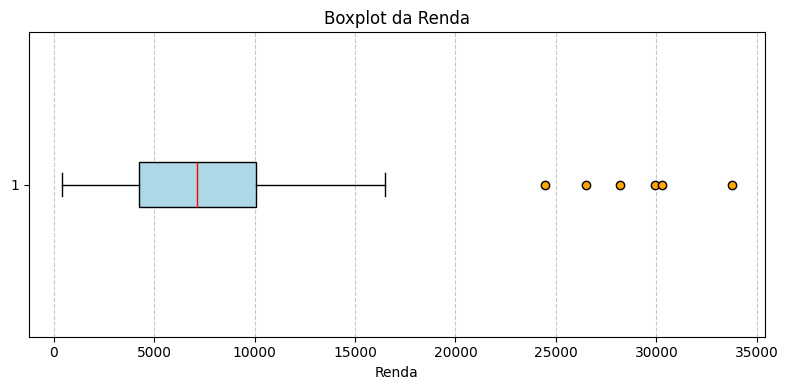

In [20]:
#Análise Consolidada - Renda
def analise_descritiva_renda(df):
    dados = df['renda']

    print(f'\n=== Análise Consolidada - Renda ===')
    print(f'Média da renda: {dados.mean():.2f}')
    print(f'Mediana: {dados.median():.2f}')
    print(f'Desvio Padrão: {dados.std():.4f}')
    print(f'Variância: {dados.var():.4f}')
    print(f'Valor Mínimo: {dados.min():.2f}')
    print(f'Valor Máximo: {dados.max():.2f}')

    #Cálculo da Mediana em Separado, para uso posterior
    mediana_renda = dados.median()

    q1, q2, q3 = np.percentile(dados, [25, 50, 75])
    iqr = q3 - q1
    limite_inf = q1 - 1.5 * iqr
    limite_sup = q3 + 1.5 * iqr

    print('\nMedidas de Posição:')
    print(f'Q1 (25%): {q1:.2f}')
    print(f'Q2/Mediana (50%): {q2:.2f}')
    print(f'Q3 (75%): {q3:.2f}')
    print(f'IQR: {iqr:.2f}')

    print('\nLimites para Outliers')
    print(f'Limite Inferior: {limite_inf:.2f}')
    print(f'Limite Superior: {limite_sup:.2f}')

    outliers = df[(df['renda'] < limite_inf) | (df['renda'] > limite_sup)]

    if outliers.shape[0] == 0:
        print('\nNão foram identificados outliers.')
    else:
        print(f'\nOutliers Detectados: {outliers.shape[0]}')
        print(f'O maior valor considerado outlier identificado foi R${outliers["renda"].max():.2f}, que ocorreu {outliers[outliers["renda"] == outliers["renda"].max()].shape[0]} vezes.')
        print(f'O menor valor considerado outlier identificado foi R${outliers["renda"].min():.2f}, que ocorreu {outliers[outliers["renda"] == outliers["renda"].min()].shape[0]} vezes.')
        print(f'\nAbaixo, os outliers detectados:\n\n{outliers[["id", "renda"]].to_string(index=False)}\n')
    
    # === Gráfico Boxplot ===
    plt.figure(figsize=(8, 4))
    plt.boxplot(dados, vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red'),
                flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'))
    plt.title('Boxplot da Renda')
    plt.xlabel('Renda')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Chamando a função para analisar 
analise_descritiva_renda(df)

## 5.2 - Verificando os outliers - Idade


=== Análise Consolidada - Idade ===
Média da idade: 43.57
Mediana: 44.00
Desvio Padrão: 16.0932
Variância: 258.9900
Valor Mínimo: 1.00
Valor Máximo: 118.00

Medidas de Posição:
Q1 (25%): 30.00
Q2/Mediana (50%): 44.00
Q3 (75%): 57.00
IQR: 27.00

Limites para Outliers
Limite Inferior: -10.50
Limite Superior: 97.50

Outliers Detectados: 3
O maior valor considerado outlier identificado foi 118.00, que ocorreu 1 vezes.
O menor valor considerado outlier identificado foi 101.00, que ocorreu 1 vezes.

Abaixo, os outliers detectados:

  id  idade
 851  101.0
1053  118.0
1442  106.0



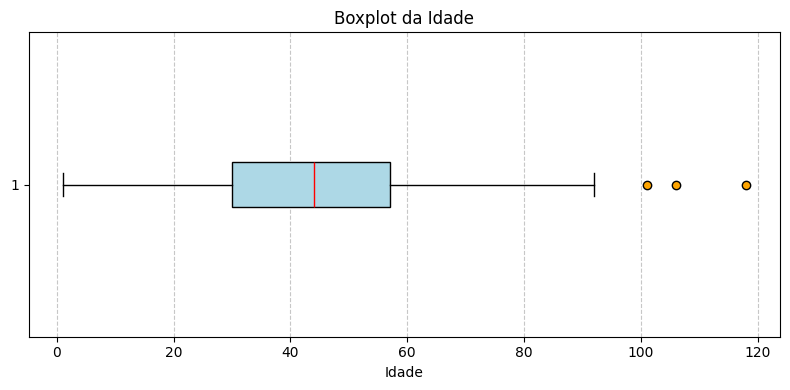

In [22]:
#Análise Consolidada - Idade
def analise_descritiva_idade(df):
    dados = df['idade']

    print(f'\n=== Análise Consolidada - Idade ===')
    print(f'Média da idade: {dados.mean():.2f}')
    print(f'Mediana: {dados.median():.2f}')
    print(f'Desvio Padrão: {dados.std():.4f}')
    print(f'Variância: {dados.var():.4f}')
    print(f'Valor Mínimo: {dados.min():.2f}')
    print(f'Valor Máximo: {dados.max():.2f}')

    #Cálculo da Mediana em Separado, para uso posterior
    mediana_idade = dados.median()

    q1, q2, q3 = np.percentile(dados, [25, 50, 75])
    iqr = q3 - q1
    limite_inf = q1 - 1.5 * iqr
    limite_sup = q3 + 1.5 * iqr

    print('\nMedidas de Posição:')
    print(f'Q1 (25%): {q1:.2f}')
    print(f'Q2/Mediana (50%): {q2:.2f}')
    print(f'Q3 (75%): {q3:.2f}')
    print(f'IQR: {iqr:.2f}')

    print('\nLimites para Outliers')
    print(f'Limite Inferior: {limite_inf:.2f}')
    print(f'Limite Superior: {limite_sup:.2f}')

    outliers = df[(df['idade'] < limite_inf) | (df['idade'] > limite_sup)]

    if outliers.shape[0] == 0:
        print('\nNão foram identificados outliers.')
    else:
        print(f'\nOutliers Detectados: {outliers.shape[0]}')
        print(f'O maior valor considerado outlier identificado foi {outliers["idade"].max():.2f}, que ocorreu {outliers[outliers["idade"] == outliers["idade"].max()].shape[0]} vezes.')
        print(f'O menor valor considerado outlier identificado foi {outliers["idade"].min():.2f}, que ocorreu {outliers[outliers["idade"] == outliers["idade"].min()].shape[0]} vezes.')
        print(f'\nAbaixo, os outliers detectados:\n\n{outliers[["id", "idade"]].to_string(index=False)}\n')
    
    # === Gráfico Boxplot ===
    plt.figure(figsize=(8, 4))
    plt.boxplot(dados, vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red'),
                flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'))
    plt.title('Boxplot da Idade')
    plt.xlabel('Idade')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    


# Chamando a função para analisar
analise_descritiva_idade(df)

## 5.3 - Verificando os outliers - Nota


=== Análise Consolidada - Nota ===
Média da Nota: 4.97
Mediana: 5.00
Desvio Padrão: 2.9180
Variância: 8.5147
Valor Mínimo: -3.70
Valor Máximo: 14.60

Medidas de Posição:
Q1 (25%): 2.50
Q2/Mediana (50%): 5.00
Q3 (75%): 7.30
IQR: 4.80

Limites para Outliers
Limite Inferior: -4.70
Limite Superior: 14.50

Outliers Detectados: 1
O maior valor considerado outlier identificado foi 14.60, que ocorreu 1 vezes.
O menor valor considerado outlier identificado foi 14.60, que ocorreu 1 vezes.

Abaixo, os outliers detectados:

 id  nota
830  14.6



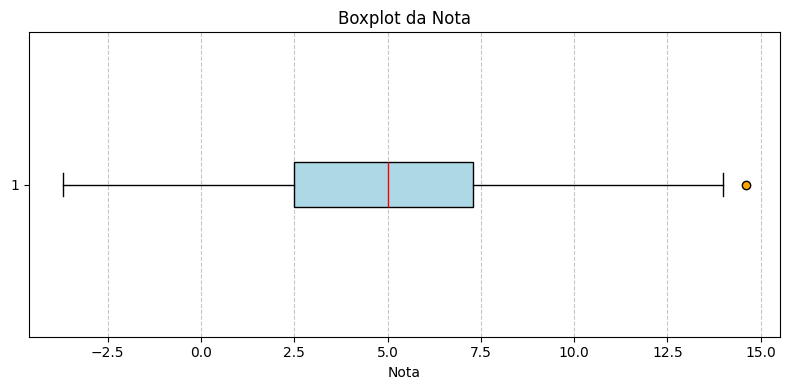

In [23]:
#Análise Consolidada - Nota
def analise_descritiva_nota(df):
    dados = df['nota']

    print(f'\n=== Análise Consolidada - Nota ===')
    print(f'Média da Nota: {dados.mean():.2f}')
    print(f'Mediana: {dados.median():.2f}')
    print(f'Desvio Padrão: {dados.std():.4f}')
    print(f'Variância: {dados.var():.4f}')
    print(f'Valor Mínimo: {dados.min():.2f}')
    print(f'Valor Máximo: {dados.max():.2f}')

    #Cálculo da Mediana em Separado, para uso posterior
    mediana_idade = dados.median()

    q1, q2, q3 = np.percentile(dados, [25, 50, 75])
    iqr = q3 - q1
    limite_inf = q1 - 1.5 * iqr
    limite_sup = q3 + 1.5 * iqr

    print('\nMedidas de Posição:')
    print(f'Q1 (25%): {q1:.2f}')
    print(f'Q2/Mediana (50%): {q2:.2f}')
    print(f'Q3 (75%): {q3:.2f}')
    print(f'IQR: {iqr:.2f}')

    print('\nLimites para Outliers')
    print(f'Limite Inferior: {limite_inf:.2f}')
    print(f'Limite Superior: {limite_sup:.2f}')

    outliers = df[(df['nota'] < limite_inf) | (df['nota'] > limite_sup)]

    if outliers.shape[0] == 0:
        print('\nNão foram identificados outliers.')
    else:
        print(f'\nOutliers Detectados: {outliers.shape[0]}')
        print(f'O maior valor considerado outlier identificado foi {outliers["nota"].max():.2f}, que ocorreu {outliers[outliers["nota"] == outliers["nota"].max()].shape[0]} vezes.')
        print(f'O menor valor considerado outlier identificado foi {outliers["nota"].min():.2f}, que ocorreu {outliers[outliers["nota"] == outliers["nota"].min()].shape[0]} vezes.')
        print(f'\nAbaixo, os outliers detectados:\n\n{outliers[["id", "nota"]].to_string(index=False)}\n')
    
    # === Gráfico Boxplot ===
    plt.figure(figsize=(8, 4))
    plt.boxplot(dados, vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red'),
                flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'))
    plt.title('Boxplot da Nota')
    plt.xlabel('Nota')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    


# Chamando a função para analisar
analise_descritiva_nota(df)

### 5.3.1 - Remoção dos Outliers - Nota

In [30]:
##Cálculo dos limites fora da função anterior, para remoção dos outliers
q1, q2, q3 = np.percentile(df['nota'], [25, 50, 75])
iqr = q3 - q1
limite_inf = q1 - 1.5 * iqr
limite_sup = q3 + 1.5 * iqr

##Criação de um dataframe em separado para verificar o impacto da remoção dos outliers
df_clean = df[(df['nota'] >= limite_inf) & (df['nota'] <= limite_sup)].copy()

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1999 non-null   int64  
 1   idade      1999 non-null   float64
 2   renda      1999 non-null   float64
 3   cidade     1999 non-null   object 
 4   categoria  1978 non-null   object 
 5   nota       1999 non-null   float64
 6   feedback   1999 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 124.9+ KB


### 5.3.2 - Remoção dos Outliers - Renda

In [32]:
##Cálculo dos limites fora da função anterior, para remoção dos outliers
q1, q2, q3 = np.percentile(df['renda'], [25, 50, 75])
iqr = q3 - q1
limite_inf = q1 - 1.5 * iqr
limite_sup = q3 + 1.5 * iqr

##Criação de um dataframe em separado para verificar o impacto da remoção dos outliers
df_clean = df_clean[(df_clean['renda'] >= limite_inf) & (df_clean['renda'] <= limite_sup)].copy()

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1993 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1993 non-null   int64  
 1   idade      1993 non-null   float64
 2   renda      1993 non-null   float64
 3   cidade     1993 non-null   object 
 4   categoria  1972 non-null   object 
 5   nota       1993 non-null   float64
 6   feedback   1993 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 124.6+ KB


### 5.3.3 - Remoção dos Outliers - Idade

In [34]:
##Cálculo dos limites fora da função anterior, para remoção dos outliers
q1, q2, q3 = np.percentile(df['idade'], [25, 50, 75])
iqr = q3 - q1
limite_inf = q1 - 1.5 * iqr
limite_sup = q3 + 1.5 * iqr

##Criação de um dataframe em separado para verificar o impacto da remoção dos outliers
df_clean = df_clean[(df_clean['idade'] >= limite_inf) & (df_clean['idade'] <= limite_sup)].copy()

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1991 non-null   int64  
 1   idade      1991 non-null   float64
 2   renda      1991 non-null   float64
 3   cidade     1991 non-null   object 
 4   categoria  1970 non-null   object 
 5   nota       1991 non-null   float64
 6   feedback   1991 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 124.4+ KB


# 6. Encoding das variáveis qualitativas

### Ao fazer o encoding, é garantida a possibilidade de quantificar em 0/1 (true or false) todas as variáveis qualitativas do dataset, permitindo uma melhor análise por parte do modelo de ML.

In [36]:
df_encoded = pd.get_dummies(
    df_clean, 
    columns=['cidade', 'feedback'], 
    drop_first=False,
    dtype=int  # Garante que os valores serão 0 ou 1 (int) em vez de True/False (bool)
)

In [37]:
##Informações do dataframe após o encoding
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1991 non-null   int64  
 1   idade                  1991 non-null   float64
 2   renda                  1991 non-null   float64
 3   categoria              1970 non-null   object 
 4   nota                   1991 non-null   float64
 5   cidade_Belo Horizonte  1991 non-null   int64  
 6   cidade_Desconhecido    1991 non-null   int64  
 7   cidade_Rio de Janeiro  1991 non-null   int64  
 8   cidade_São Paulo       1991 non-null   int64  
 9   cidade_Vitória         1991 non-null   int64  
 10  feedback_Bom           1991 non-null   int64  
 11  feedback_Desconhecido  1991 non-null   int64  
 12  feedback_Regular       1991 non-null   int64  
 13  feedback_Ruim          1991 non-null   int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 233.3+ KB


In [38]:
##Display das primeiras 15 linhas, para exemplificar o encoding
df_encoded.head(15)

,id,idade,renda,categoria,nota,cidade_Belo Horizonte,cidade_Desconhecido,cidade_Rio de Janeiro,cidade_São Paulo,cidade_Vitória,feedback_Bom,feedback_Desconhecido,feedback_Regular,feedback_Ruim
0,1,39.0,5112.57,A,4.5,1,0,0,0,0,1,0,0,0
1,2,64.0,9510.34,B,5.4,1,0,0,0,0,0,0,0,1
2,3,61.0,8970.80,B,5.0,0,0,0,1,0,0,0,0,1
3,4,61.0,8526.52,A,1.8,0,0,1,0,0,1,0,0,0
4,5,53.0,3531.76,B,5.5,0,0,0,0,1,1,0,0,0
5,6,23.0,7492.18,B,2.4,0,0,1,0,0,0,0,1,0
6,7,19.0,2478.38,A,3.0,1,0,0,0,0,0,0,0,1
7,8,65.0,4143.16,A,3.4,1,0,0,0,0,0,0,1,0
8,9,24.0,6109.96,A,4.4,0,0,0,0,1,0,0,1,0
9,10,17.0,8320.09,A,1.6,1,0,0,0,0,0,0,1,0


# 7. Normalização dos dados

### A normalização possibilita que todas as variáveis quantitativas do dataset sejam comparadas dentro d euma mesma escala, mitigando assim a possibilidade de ocorrerem distorções na análise de MachineLearning

In [39]:
##Geração da normalização dentro do dataframe encoded
numeric_cols = ['idade', 'renda', 'nota']
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [40]:
##Visualização das linhas para exemplificar a normalização aplicada
df_encoded.head(10)

,id,idade,renda,categoria,nota,cidade_Belo Horizonte,cidade_Desconhecido,cidade_Rio de Janeiro,cidade_São Paulo,cidade_Vitória,feedback_Bom,feedback_Desconhecido,feedback_Regular,feedback_Ruim
0,1,-0.283629,-0.607904,A,-0.155372,1,0,0,0,0,1,0,0,0
1,2,1.301376,0.705363,B,0.157239,1,0,0,0,0,0,0,0,1
2,3,1.111176,0.544245,B,0.018301,0,0,0,1,0,0,0,0,1
3,4,1.111176,0.411573,A,-1.093203,0,0,1,0,0,1,0,0,0
4,5,0.603974,-1.079967,B,0.191973,0,0,0,0,1,1,0,0,0
5,6,-1.298033,0.102697,B,-0.884796,0,0,1,0,0,0,0,1,0
6,7,-1.551634,-1.394529,A,-0.676389,1,0,0,0,0,0,0,0,1
7,8,1.364777,-0.897390,A,-0.537451,1,0,0,0,0,0,0,1,0
8,9,-1.234633,-0.310063,A,-0.190106,0,0,0,0,1,0,0,1,0
9,10,-1.678434,0.349929,A,-1.162672,1,0,0,0,0,0,0,1,0


# 8. Salvamento do dataset pré-processado

In [41]:
df_encoded.to_csv('dataset_sudeste_simples_outliers-2k_tratado.csv', index=False)